In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits import mplot3d
from matplotlib import rcParams
import matplotlib.colors as colors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import LogLocator, LogFormatter, MultipleLocator, FixedLocator
import copy
import math
import sys
import time
import pandas as pd
import decimal
import darkcast
import os
import inspect
import itertools
sys.setrecursionlimit(2000)

In [2]:
# Define the font family and size
font = {'family' : 'serif', 'size' : 20 }
mpl.rc('font', **font)
mpl.rcParams['mathtext.fontset'] = 'cm' # Set the math font to Computer Modern
mpl.rcParams['legend.fontsize'] = 1

In [3]:
def read_formatted_data(file_path):
    data = []
    with open(file_path, "r") as input_file:
        lines = input_file.readlines()
        for line in lines[1:]:  # Skip the header line
            parts = line.strip().split()
            mass = float(parts[0])
            lower = float(parts[1])
            upper = float(parts[2])
            data.append((mass, lower, upper))
    return data

In [4]:
nEvents_mins = [1,2,3,5,10,100]

data = []
for nEvents_min in nEvents_mins:
    # Replace 'file_path_here' with the actual path of the file produced by the code
    input_file_path = "SciBooNE_%s.lmt" % nEvents_min # Change the file name accordingly
    try:
        formatted_data = read_formatted_data(input_file_path)
        data.append(formatted_data)
        # for limit in formatted_data:
            # print(f"Mass: {limit[0]:10.4e} Lower: {limit[1]:10.4e} Upper: {limit[2]:10.4e}")
    except FileNotFoundError:
        print(f"Error: File '{input_file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [5]:
# Settings
reach_plot = False
reach_color = 'darkgray'
# reach_fill_alpha
limit_plot = True
limit_color = 'gray'

lim_x = [2e-3 , 2e-1]
lim_y = [1e-14, 0.9e-6]
# lim_x = [2e-3 , 1e2]
# lim_y = [1e-17, 1e1]

No model is defined for 'AMM'.
No model is defined for 'ATLAS_Aad2014yea'.
No model is defined for 'ATLAS_Aad2015sms'.
No model is defined for 'ATLAS_Aad2019tua'.
No model is defined for 'CMS_CMS2016tgd'.
No model is defined for 'CMS_CMS2018rdr'.


/home/jovyan/DS-Decay-Scripts/darkcast/limit.py:272: UserWarning: Could not load limit 'AMM.py'.
  warnings.warn("Could not load limit '%s'." % limit)
/home/jovyan/DS-Decay-Scripts/darkcast/limit.py:272: UserWarning: Could not load limit 'ATLAS_Aad2014yea.py'.
  warnings.warn("Could not load limit '%s'." % limit)
/home/jovyan/DS-Decay-Scripts/darkcast/limit.py:272: UserWarning: Could not load limit 'ATLAS_Aad2015sms.py'.
  warnings.warn("Could not load limit '%s'." % limit)
/home/jovyan/DS-Decay-Scripts/darkcast/limit.py:272: UserWarning: Could not load limit 'ATLAS_Aad2019tua.py'.
  warnings.warn("Could not load limit '%s'." % limit)
/home/jovyan/DS-Decay-Scripts/darkcast/limit.py:272: UserWarning: Could not load limit 'CMS_CMS2016tgd.py'.
  warnings.warn("Could not load limit '%s'." % limit)
/home/jovyan/DS-Decay-Scripts/darkcast/limit.py:272: UserWarning: Could not load limit 'CMS_CMS2018rdr.py'.
  warnings.warn("Could not load limit '%s'." % limit)


Recasting limits to the dark_photon model.
A1_Merkel2011ze
A1_Merkel2014avp
AMMe_Bodas2021fsy_cs
AMMe_Bodas2021fsy_rb
AMMmu_Bodas2021fsy
AMMmu_Bodas2021fsy_2l
AMMmu_Bodas2021fsy_2u
APEX_Abrahamyan2011gv
BESIII_Ablikim2017aab
BaBar_Lees2014xha
BaBar_TheBABAR2016rlg
Borexino_Bauer2018onh
CHARMII_Bauer2018onh
CHARM_Bergsma1985qz
CHARM_Tsai2019mtm
CMS_CMS2019kiy
E137_Andreas2012mt
E137_Bjorken2009mm
E141_Riordan1987aw
E774_Bross1989mp
FASER_Petersen2023hgm
HPS_Adrian2018scb
KEK_Konaka1986cb
KLOE_Anastasi2015qla
KLOE_Anastasi2016ktq
KLOE_Anastasi2018azp_combined
KLOE_Anastasi2018azp_mumu
KLOE_Babusci2012cr
KLOE_Babusci2014sta
LHCb_Aaij2017rft_displaced
LHCb_Aaij2017rft_prompt
LHCb_Aaij2019bvg_displaced
LHCb_Aaij2019bvg_prompt
NA48_Batley2015lha
NA62_Dobrich2023dkm
NA64_Banerjee2018vgk
NA64_Banerjee2019hmi
NOMAD_Astier2001ck
NuCAL_Blumlein1990ay
NuCAL_Blumlein1991xh
NuCAL_Tsai2019mtm
Orsay_Davier1989wz
PS191_Bernardi1985ny
Texono_Bauer2018onh
SciBooNE_1
SciBooNE_2
SciBooNE_3
SciBooNE_5
SciBo

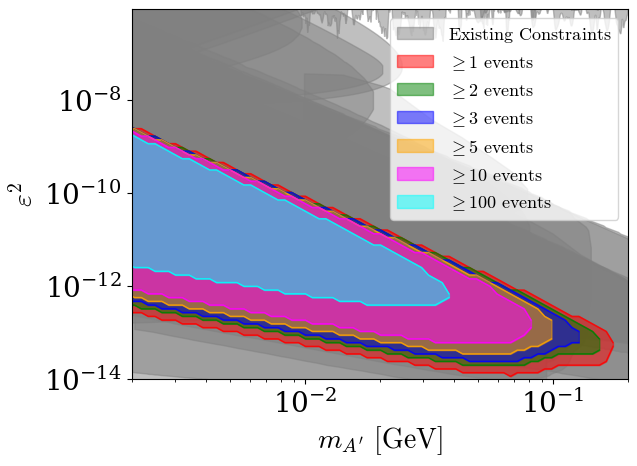

In [6]:
models = darkcast.Models()
model = darkcast.Model("dark_photon")

try: import matplotlib.pyplot as pyplot
except: pyplot = None
colors = ["red", "green", "blue", "orange", "magenta", "cyan", "gray"]
if pyplot:
    fig, ax = pyplot.subplots()
    icolor, labels = itertools.cycle(colors), {}

labelGray = False
if reach_plot:
    limits = darkcast.Limits("reach")
    if not os.path.exists("darkcast/recast/reach"): os.makedirs("recast/reach")
    for name, model in models.items():
        if name != "dark_photon": continue

        print("Recasting limits to the %s model." % name)
        if not os.path.exists("darkcast/recast/reach/" + name):
            os.makedirs("darkcast/recast/reach/" + name)

        for label, limit in limits.items():
            if label == "SciBooNE_1": continue
            if limit.model.width('invisible', 1) != 0: continue
            else: print(label)

            recast = limit.recast(model)
            if recast == None: continue

            recast.write("darkcast/recast/reach/%s/%s.lmt" % (name, label))

            if pyplot:
                for x, y in recast.plots():
                    y = [i**2 for i in y]
                    label = darkcast.utils.latex(limit.production)
                    if not label in labels: c = next(icolor); labels[label] = c
                    else: c = labels[label]; label = None
                    c = reach_color
                    if not labelGray:
                        ax.fill(x, y, alpha = 0.0, color = c, label = "Existing Constraints")
                        labelGray = True
                    else:
                        ax.fill(x, y, alpha = 0.0, color = c)#, label = label
                    ax.plot(x, y, alpha = 0.8, color = c)#, label = label

if limit_plot:
    limits = darkcast.Limits()
    if not os.path.exists("darkcast/recast/limits"): os.makedirs("recast/limits")
    for name, model in models.items():
        if name != "dark_photon": continue

        print("Recasting limits to the %s model." % name)
        if not os.path.exists("darkcast/recast/limits/" + name):
            os.makedirs("darkcast/recast/limits/" + name)

        for label, limit in limits.items():
            if label == "SciBooNE_1": continue
            if (limit.model.width("invisible", 1) != 0 and
                not limit.production.name.endswith("_scat")): continue
            else: print(label)

            recast = limit.recast(model)
            if recast == None: continue

            recast.write("darkcast/recast/limits/%s/%s.lmt" % (name, label))

            if pyplot:
                for x, y in recast.plots():
                    y = [i**2 for i in y]
                    # lbl = darkcast.utils.latex(limit)
                    # if not lbl in lbls: c = next(icolor); lbls[lbl] = c
                    # else: c = lbls[lbl]; lbl = None
                    c = limit_color
                    f = not (label.endswith("_2l") or label.endswith("_2u"))
                    if not labelGray:
                        ax.fill(x, y, alpha = 0.5, fill = f, color = c, label = "$\mathrm{Existing}$ $\mathrm{Constraints}$")
                        labelGray = True
                    else:
                        ax.fill(x, y, alpha = 0.5, fill = f, color = c)#, label = lbl)

num = 0
for nEvents_min in nEvents_mins:
    print("SciBooNE_%s" % nEvents_min)
    masses       = [limit[0] for limit in data[num]]
    lower_limits = [limit[1] for limit in data[num]]
    upper_limits = [limit[2] for limit in data[num]]
    c = colors[num]
    # c = colors[5]
    ax.fill_between(masses, lower_limits, upper_limits, color=c, alpha=0.5,label="$\geq %s$ $\mathrm{events}$" % nEvents_min)
    ax.plot(masses, lower_limits, color=c, linewidth=1, alpha=0.8)
    ax.plot(masses, upper_limits, color=c, linewidth=1, alpha=0.8)

    num += 1

def exponential_minor_formatter(x, pos):
    return "{:.1e}".format(x)

# Save the plot.
if pyplot:
    legend = ax.legend(loc = "upper right", ncol = 1, fontsize = 13)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(lim_x)
    ax.set_ylim(lim_y)
    ax.set_xlabel("$m_{A'}$ $\mathrm{[GeV]}$")
    ax.set_ylabel(r"$\varepsilon^2$")
    ax.set_title("")
    plt.minorticks_on()
    # darkcast.utils.logo()
    fig.savefig("reach+exp_sensativity.pdf",bbox_inches='tight')
    plt.show()